# Daily Double Location Probability
The purpose of this notebook is to visualize the probability of a clue's location containing the Daily Double. We do this by using NumPy arrays to count the locations of Daily Doubles for the Jeopardy and Double Jeopardy rounds, and then dividing the array by the array sum to find the probability. 

In [1]:
# Import packages and read data
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = 125
pd.options.display.max_rows = 100
os.chdir('C:\\Users\\mhous\\scrap\\JeopardyProject')
clues = pd.read_csv('clues.csv')

In [121]:
# Subset the data to only the necessary columns
df = clues[['value', 'round', 'column', 'row', 'order_number']]

# Create boolean array for Daily Doubles
daily_doubles_bool = df['value'].str.contains('DD')

print('Summary Statistics of Daily Double by Order Number:')
df[daily_doubles_bool]['order_number'].astype(int).describe()

Summary Statistics of Daily Double by Order Number:


count    12705.000000
mean        16.191736
std          8.306012
min          1.000000
25%          9.000000
50%         16.000000
75%         23.000000
max         30.000000
Name: order_number, dtype: float64

In [89]:
# Initialize empty NumPy arrays
array_J = np.zeros((5,6))
array_DJ = np.zeros((5,6))

In [115]:
# Subset data to only daily doubles
dd = df[daily_doubles_bool]
# For loop counts the number of occurrences of the daily double in each tile of the grid. Uses if statement to separate the Jeopardy and Double Jeopardy rounds
for i in range(len(dd)):
    if dd.iloc[i]['round'] == 'J':
        row = int(dd.iloc[i]['row']) - 1
        col = int(dd.iloc[i]['column']) - 1
        array_J[row][col] += 1
    else:
        row = int(dd.iloc[i]['row']) - 1
        col = int(dd.iloc[i]['column']) -1
        array_DJ[row][col] +=1

In [116]:
# Convert the arrays to probabilities, rounded to two decimal places
prob_array_J = 100 * array_J/np.sum(array_J)
prob_array_J = np.round(prob_array_J, 2)
print('Probability of Daily Double in Jeopardy Round')
print(prob_array_J)

prob_array_DJ = 100 * array_DJ/np.sum(array_DJ)
prob_array_DJ = np.round(prob_array_DJ, 2)
print('\n\nProbability of Daily Double in Double Jeopardy Round')
print(prob_array_DJ)

Probability of Daily Double in Jeopardy Round
[[0.02 0.01 0.01 0.01 0.04 0.  ]
 [2.35 1.16 1.83 1.47 1.69 0.98]
 [6.23 3.37 5.11 5.14 4.62 3.26]
 [7.72 4.83 6.76 6.37 6.4  4.48]
 [5.84 3.23 4.9  4.77 4.24 3.16]]


Probability of Daily Double in Double Jeopardy Round
[[0.01 0.01 0.05 0.01 0.01 0.  ]
 [2.68 1.57 2.   1.66 2.08 1.22]
 [6.14 3.53 5.22 5.02 4.89 3.62]
 [7.37 4.7  7.22 6.3  7.1  4.78]
 [4.86 2.51 3.94 4.57 3.91 3.03]]


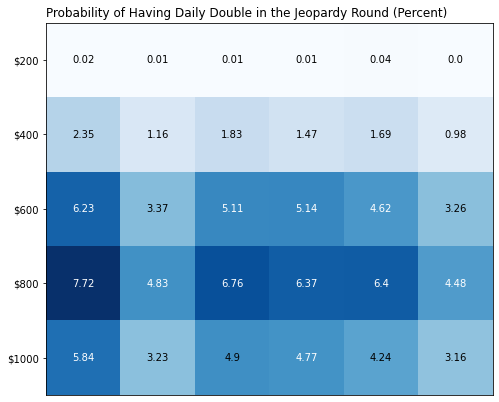

In [117]:
# Plot the heatmat
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(prob_array_J, cmap = 'Blues')
for i in range(5):
    for j in range(6):
        if prob_array_DJ[i, j] >=4.5:
            text = ax.text(j, i, prob_array_J[i, j], ha="center", va="center", color="w")
        else:
            text = ax.text(j, i, prob_array_J[i, j], ha="center", va="center", color="black")
            
            
plt.title('Probability of Having Daily Double in the Jeopardy Round (Percent)', loc='left')
ax.set_yticklabels(['', '$200', '$400', '$600', '$800', '$1000'])
plt.tick_params(axis='x', which='both',bottom=False, labelbottom=False)
plt.show()

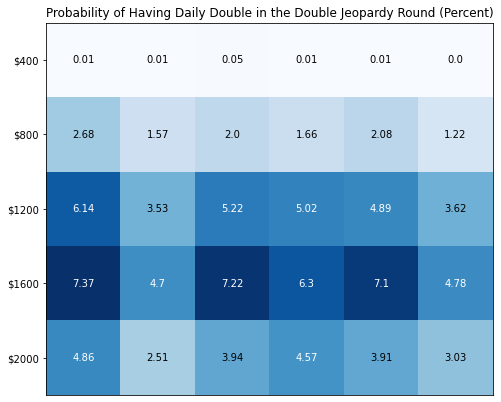

In [118]:
# Plot the heatmap
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(prob_array_DJ, cmap = 'Blues')
for i in range(5):
    for j in range(6):
        if prob_array_DJ[i, j] >=4.5:
            text = ax.text(j, i, prob_array_DJ[i, j], ha="center", va="center", color="w")
        else:
            text = ax.text(j, i, prob_array_DJ[i, j], ha="center", va="center", color="black")
            
plt.title('Probability of Having Daily Double in the Double Jeopardy Round (Percent)', loc='left')
ax.set_yticklabels(['', '$400', '$800', '$1200', '$1600', '$2000'])
plt.tick_params(axis='x', which='both',bottom=False, labelbottom=False)
plt.show()

# By Rows/Columns

In [119]:
print('Probability Row X Contains the Daily Double in the Jeopardy Round:')
for i in range(5):
    prob = prob_array_J.sum(axis=1)[i]
    print('Row ' + str(i+1) + ': ' + str(round(prob,2)))

Probability Row X Contains the Daily Double in the Jeopardy Round:
Row 1: 0.09
Row 2: 9.48
Row 3: 27.73
Row 4: 36.56
Row 5: 26.14


In [120]:
print('Probability Row X Contains a Daily Double in the Double Jeopardy Round:')
for i in range(5):
    prob = prob_array_DJ.sum(axis=1)[i]
    print('Row ' + str(i+1) + ': ' + str(round(prob, 2)))

Probability Row X Contains a Daily Double in the Double Jeopardy Round:
Row 1: 0.09
Row 2: 11.21
Row 3: 28.42
Row 4: 37.47
Row 5: 22.82


In [123]:
print('Probability Column X Contains the Daily Double in the Jeopardy Round:')
for i in range(6):
    prob = prob_array_J.sum(axis=0)[i]
    print('Column ' + str(i+1) + ': ' + str(round(prob,2)))

Probability Column X Contains the Daily Double in the Jeopardy Round:
Column 1: 22.16
Column 2: 12.6
Column 3: 18.61
Column 4: 17.76
Column 5: 16.99
Column 6: 11.88


In [124]:
print('Probability Column X Contains a Daily Double in the Double Jeopardy Round:')
for i in range(6):
    prob = prob_array_DJ.sum(axis=0)[i]
    print('Column ' + str(i+1) + ': ' + str(round(prob, 2)))

Probability Column X Contains a Daily Double in the Double Jeopardy Round:
Column 1: 21.06
Column 2: 12.32
Column 3: 18.43
Column 4: 17.56
Column 5: 17.99
Column 6: 12.65
